In [11]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import pymc as pm ## If this line gives you an error, uncomment and execute the following cell
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
path_to_data = 'https://raw.githubusercontent.com/ccontrer/MATH509-Winter2025-JupyterNotebooks/main/Data/'
data_all = pd.read_csv(path_to_data + "Howell1.csv", sep=";", header=0)
data_all

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


# Q1
Please use the code from the Week 3 notebook and modify it as necessary to answer this question.

Suppose a colleague of yours, who works on allometry, glances at the practice problems just above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body weight that scales with height!” Let’s take your colleague’s advice and see what happens.


# A
Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use the **entire** Howell1 data frame, all 544 rows, adults and non-adults.

\begin{align*}
    h_{i} &\sim \text{Normal}(\mu_{i}, \sigma) \\
    \mu_{i} &= \alpha + e^{\log{\beta}} \log(w_i) \\
    \alpha & \sim \\
    \log(\beta) & \sim \\
    \sigma &\sim
\end{align*}

# B
To check the prior, plot 100 sample curves from prior predictive simulations (see Week 4 notebook for examples). Is the prior reasonable? Do you think it should be changed? Why or why not?

# C
Approximate the posterior distribution using the MCMC approximation (using Pymc3).

# D
Create a plot with the following information (each is a function of weight)
  1. a scatter plot of the data (height vs weight)
  2. predicted mean height
  3. the 97% interval for the mean height (use `fillbetween`)
  4. the 97% interval for posterior predicted heights (use `fillbetween`)
  
Be sure to label the $x$ and $y$ axis. Make it look nice.

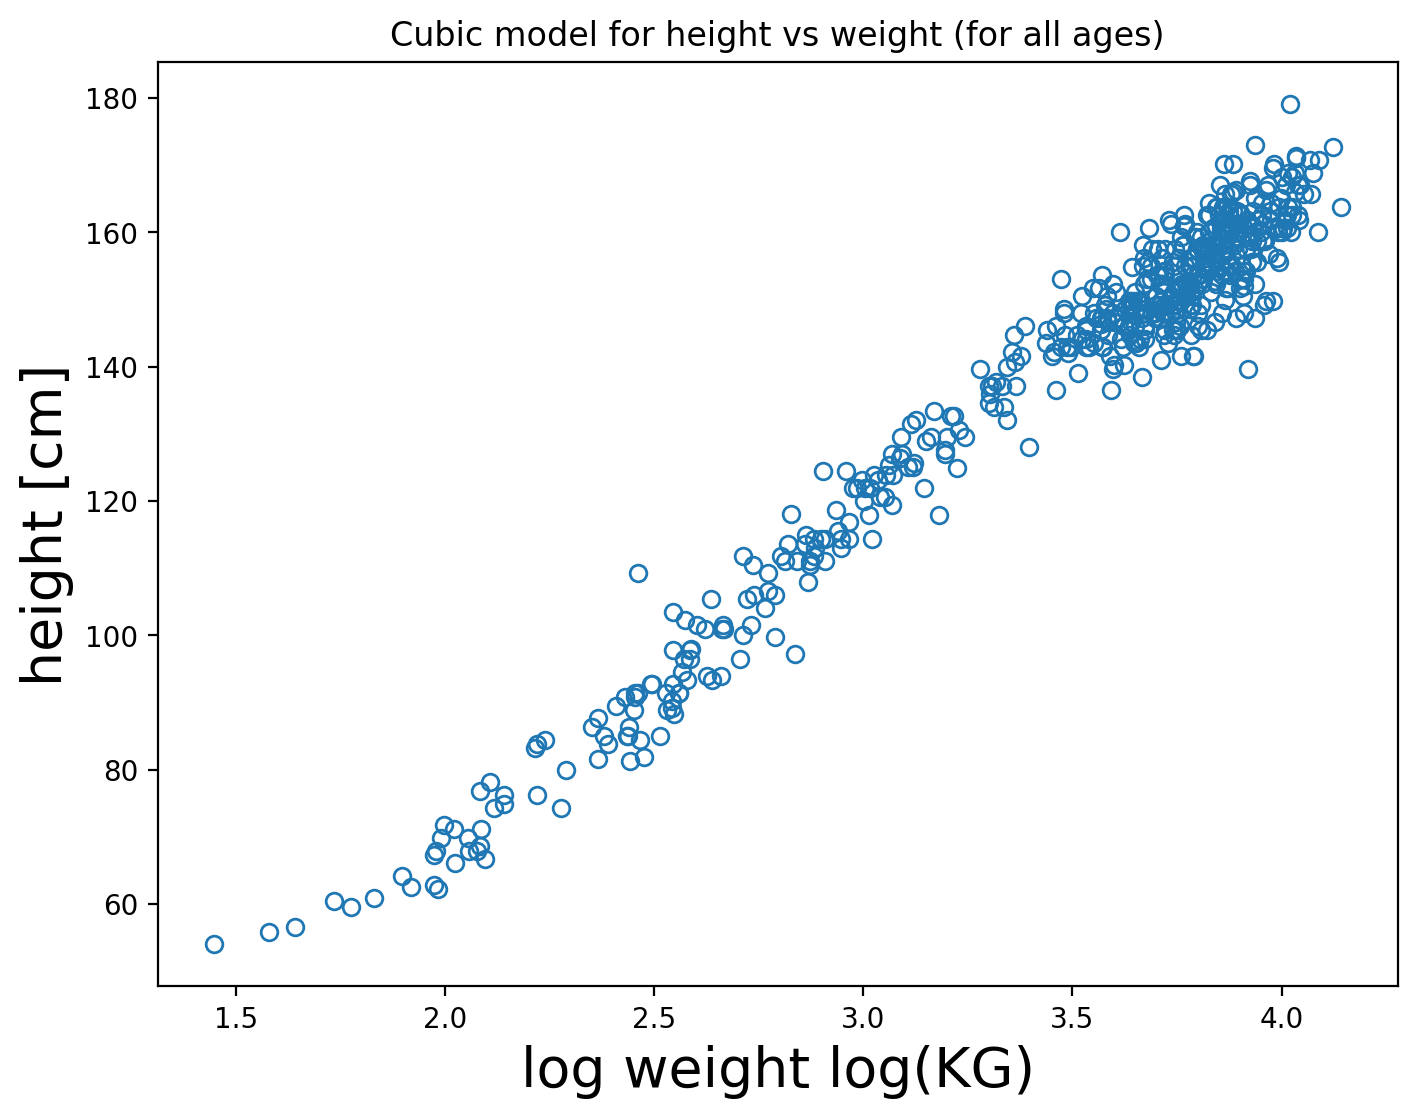

In [46]:
#Set random seed to replicate results
RANDOM_SEED = 8927
random.seed(RANDOM_SEED)

#part a
##### Figure code

figure(1, [8, 6])
plot(np.log(data_all['weight']), data_all['height'], 'o', mfc='none')



title('Cubic model for height vs log(weight) (for all ages)')
xlabel('log weight log(KG)', fontsize=20)
ylabel('height [cm]', fontsize=20);



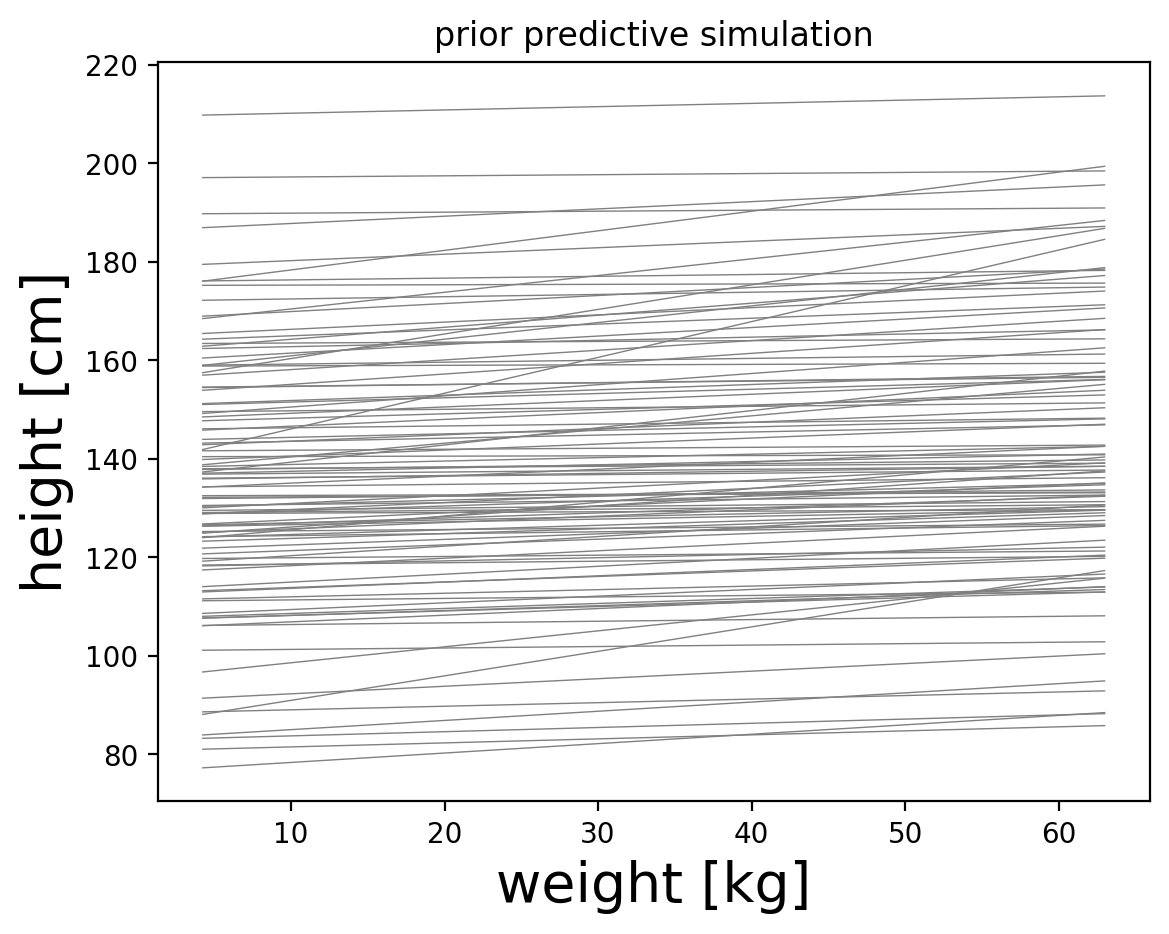

In [42]:
n_samples = 100

alpha = stats.norm.rvs(data_all['height'].mean(), data_all['height'].std(), size= n_samples)
logbeta1 = stats.norm.rvs(0, 1, n_samples)
sigma = stats.uniform.rvs(0,50, n_samples)

xmin = data_all['weight'].min()
xmax = data_all['weight'].max()
xmean = data_all['weight'].mean()
x_shifted = array(data_all['weight'] - data_all['weight'].mean())
x_standardized = x_shifted/x_shifted.std()
x = linspace(xmin, xmax, 200) ## weight range
xsmin = x_standardized.min()
xsmax = x_standardized.max()
x_s = linspace(xsmin, xsmax, 200) ## standardized weight range

mu = (alpha[None, :]
      + exp(logbeta1[None, :])*x_s[:, None])


plot(x, mu, '0.5', lw=0.5)
# ylim(-100, 400)
title('prior predictive simulation')
xlabel('weight [kg]', fontsize=20)
ylabel('height [cm]', fontsize=20);

In [47]:
#part c
pm.Normal
with pm.Model() as model_4_3:
  #chatGPT for best ways to estimate standard deviation/mean
    sigma = pm.Uniform("sigma", 0, data_all['height'].std()) ## uniform prior for sigma
    alpha = pm.Normal("alpha", mu = data_all['height'].mean(), sigma=data_all['height'].std()) ## normal prior for alpha
    logbeta = pm.Normal("logbeta", mu=0, sigma=1) ## normal prior for logbeta
    mu = alpha + np.exp(logbeta)*np.log(data_all['weight']) ## linear model (hidden variable)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=data_all['height']) ## likelihood
    trace_4_3 = pm.sample(1000, tune=1000) ## these are the MCMC samples!

trace_4_3_df = trace_4_3.posterior.to_dataframe()
trace_4_3_df

Output()

Output()

alpha   logbeta     sigma
chain draw                               
0     0    -24.900010  3.856048  5.203498
      1    -24.696415  3.859647  5.222423
      2    -22.397353  3.844592  4.998809
      3    -22.622232  3.843815  4.993360
      4    -21.967871  3.840411  4.890859
...               ...       ...       ...
1     995  -23.261032  3.848140  5.251162
      996  -22.039552  3.838937  5.212384
      997  -24.450217  3.856817  5.296819
      998  -24.484990  3.855401  5.238337
      999  -23.853518  3.850874  5.119738

[2000 rows x 3 columns]

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'logbeta'}>,
        <Axes: title={'center': 'logbeta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

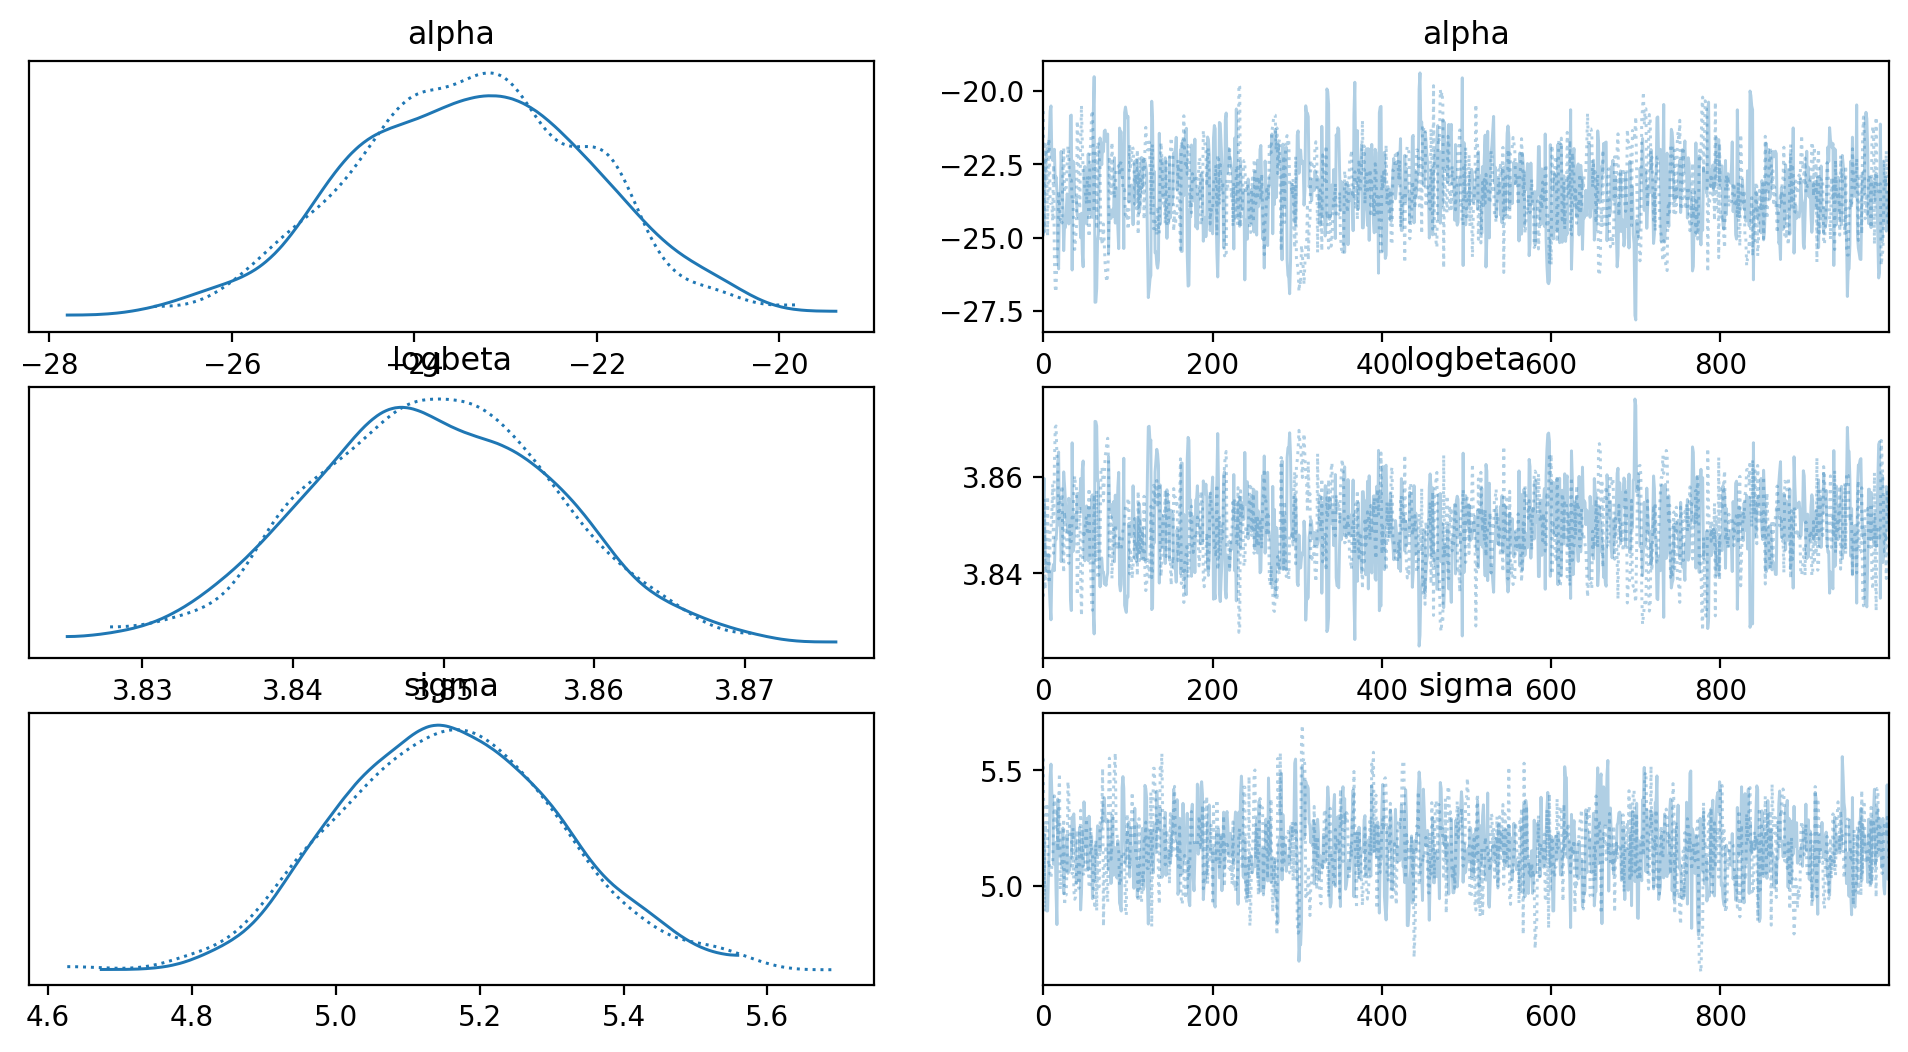

In [48]:

pm.plot_trace(trace_4_3)
#chatgpt to better understand how to interpret results
#alpha suggests when log(weight) is 0, expected height is negative. -27 to -20 cm.
#logbeta suggests when log(weight) increases by 1, height increases by around 3.8 cm
#signma suggests predicted heights vary around 5cm the mean prediction

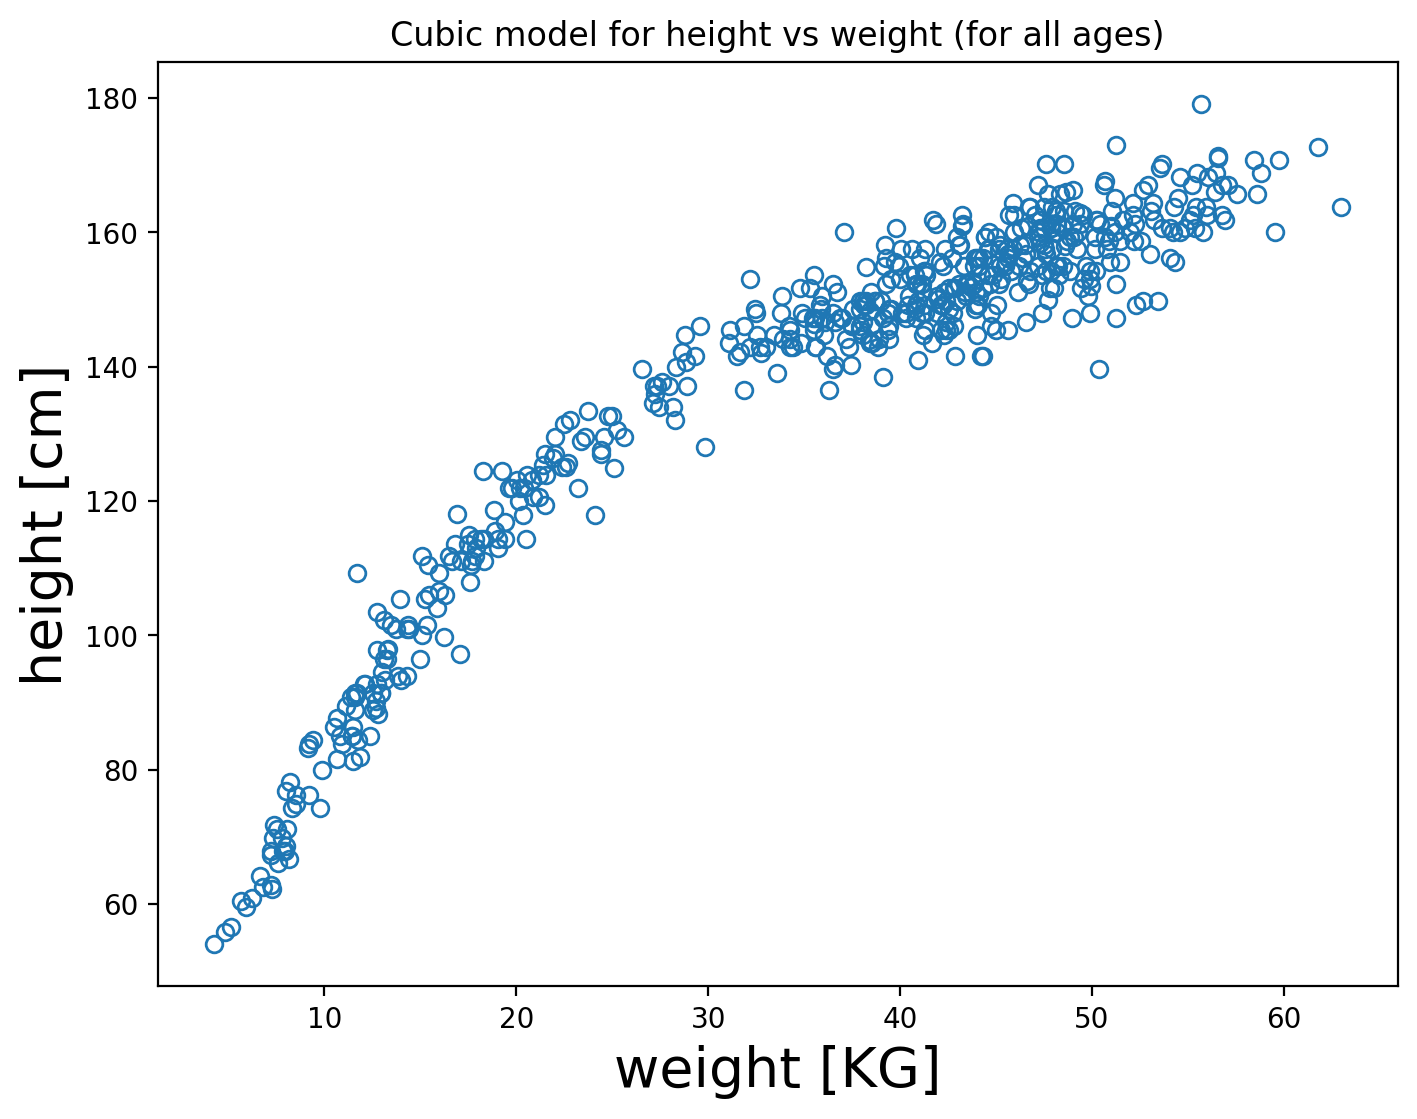

In [59]:
#Part D
#Scatter plot of weight vs hieght
figure(1, [8, 6])
plot(data_all['weight'], data_all['height'], 'o', mfc='none')
title('Cubic model for height vs weight (for all ages)')
xlabel('weight [KG]', fontsize=20)
ylabel('height [cm]', fontsize=20);




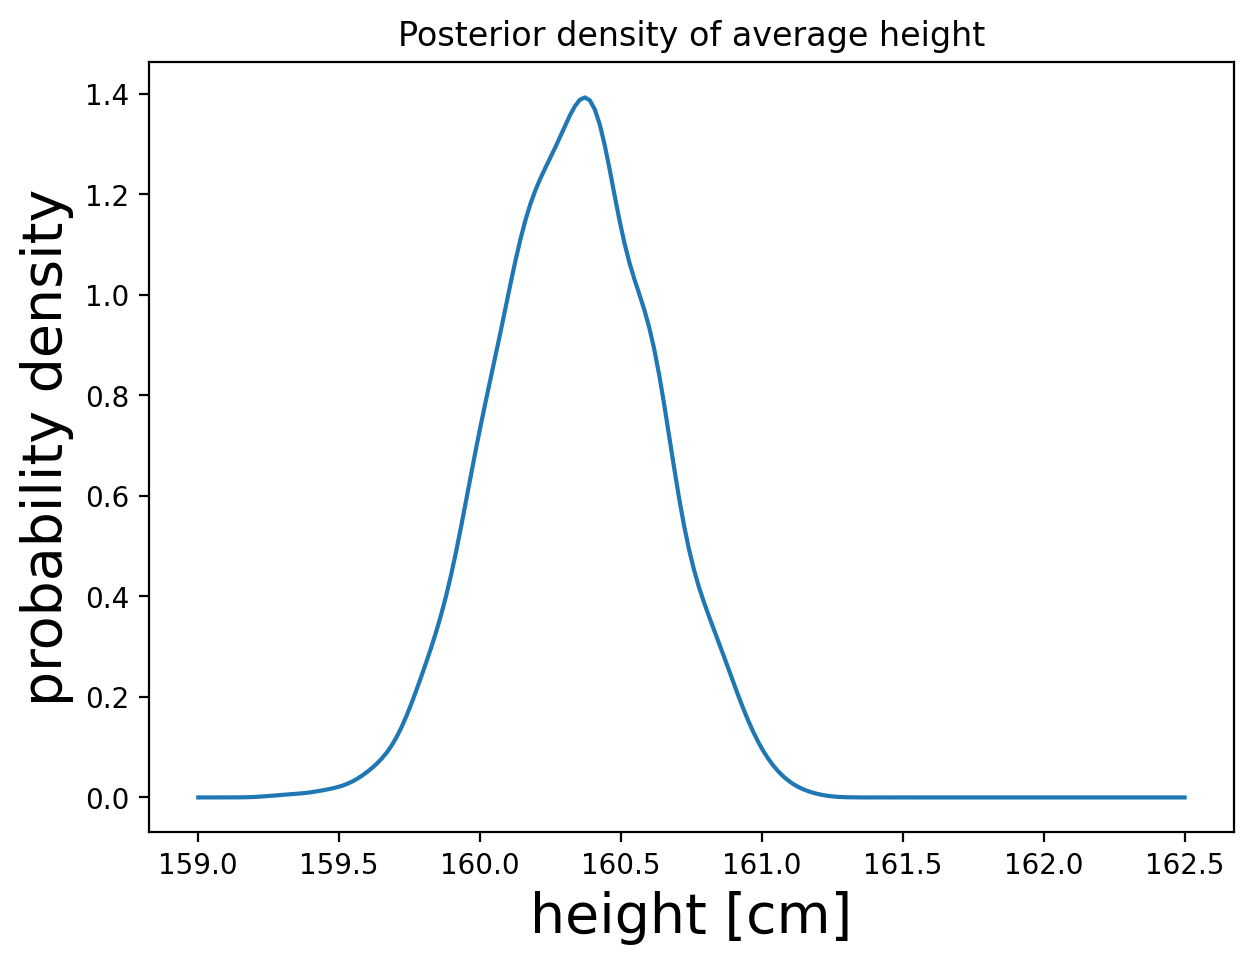

In [63]:
alpha_samples = array(trace_4_3_df['alpha'])
logbeta_samples = array(trace_4_3_df['logbeta'])
h_avg_samples = alpha_samples + exp(logbeta_samples)*np.log(50)

## using code from Week 3 notebook
kde_posterior_pdf = stats.gaussian_kde(h_avg_samples)
figure(1, [7, 5])
x_to_plot = linspace(159, 162.5, 200)
plot(x_to_plot, kde_posterior_pdf(x_to_plot))
title('Posterior density of average height')
xlabel('height [cm]', fontsize=20)
ylabel('probability density', fontsize=20);

#from the probability density, most likely height at 50kg is around 160cm

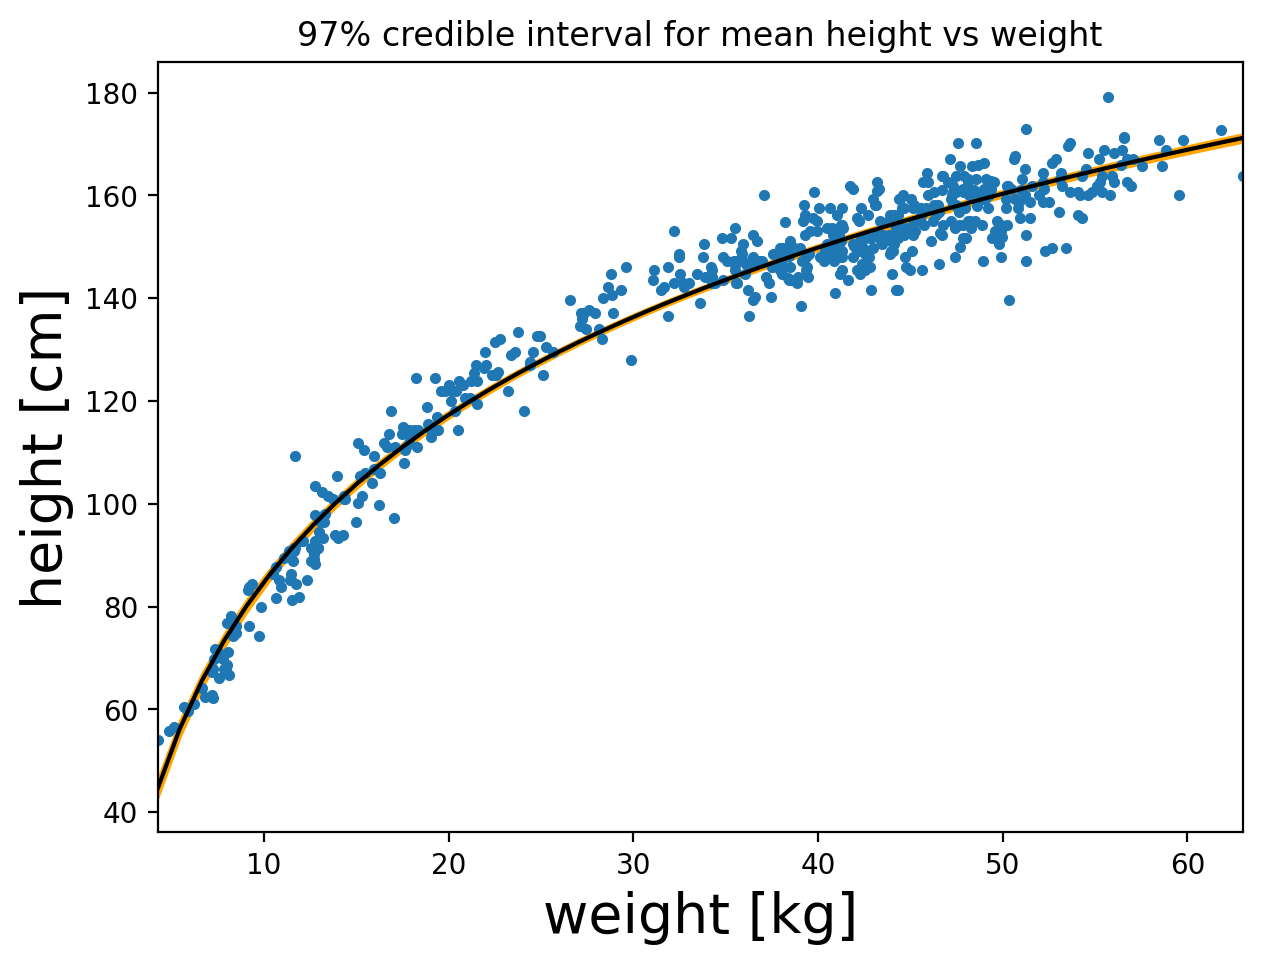

In [75]:
prob = 0.97 ## for credible intervals

xmin = data_all['weight'].min()
xmax = data_all['weight'].max()
xmean = data_all['weight'].mean()
x = linspace(xmin, xmax, 50) ## weight range
alpha_samples = array(trace_4_3_df['alpha'])[None, :]
logbeta_samples = array(trace_4_3_df['logbeta'])[None, :]
N_posterior_samples = alpha_samples.size

## the posterior mean
mu_avg = alpha_samples.mean() + exp(logbeta_samples).mean()*np.log(x)

mu_samples = alpha_samples + exp(logbeta_samples)*np.log(x[:, None])
## lower bound and upper bound for each fixed weight in the array `x`
mu_samples_sorted = sort(mu_samples, axis=1)
index = int(N_posterior_samples*(1 - prob)/2)
mu_lower = mu_samples_sorted[:, index]
mu_upper = mu_samples_sorted[:, -index]



figure(1, [7, 5])
plot(data_all['weight'], data_all['height'], '.')
fill_between(x, mu_upper, mu_lower, color='orange', alpha=1)
plot(x, mu_avg, 'k')

xlim(xmin, xmax)
title('97% credible interval for mean height vs weight')
xlabel('weight [kg]', fontsize=20)
ylabel('height [cm]', fontsize=20);